# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
data.shape

(1898, 9)

#### Observations:
* The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 5 numerical datatypes.
* restaurant_name, cuisine_type, day_of_the_week and rating has object datatype.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* The minimum food preparation time once an order is placed is 20 minutes.
* The average food preparation time once an order is placed is 27.37 minutes.
* The maximum food preparation time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
data[data['rating']=='Not given'].shape[0]

736

#### Observations:
* 736 orders are not rated in the data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Finds the number of unique customers
data['customer_id'].nunique()

1200

In [ ]:
data['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
data_array = data['customer_id'].value_counts()
data_array_1 = pd.DataFrame(data_array)
data_array_1.value_counts()

count
1        784
2        267
3         83
4         33
5         19
6          6
7          4
8          1
9          1
10         1
13         1
Name: count, dtype: int64

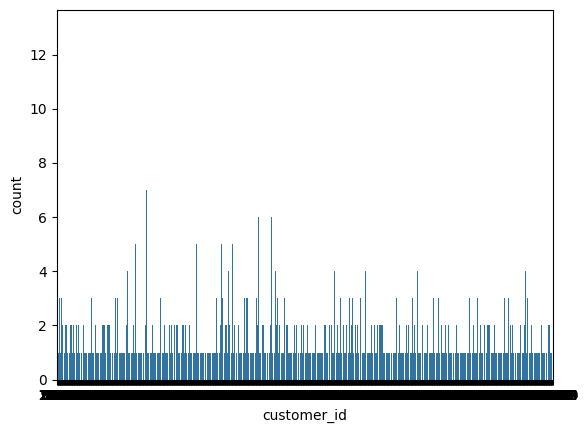

In [ ]:
sns.countplot(data=data, x='customer_id')
plt.show()

### Observations:
* Based on the data shown above, the FoodHub app has 1200 unique customers.
* The order count ranges from 1 to 13.
* 784 customers have placed only one order on the app.

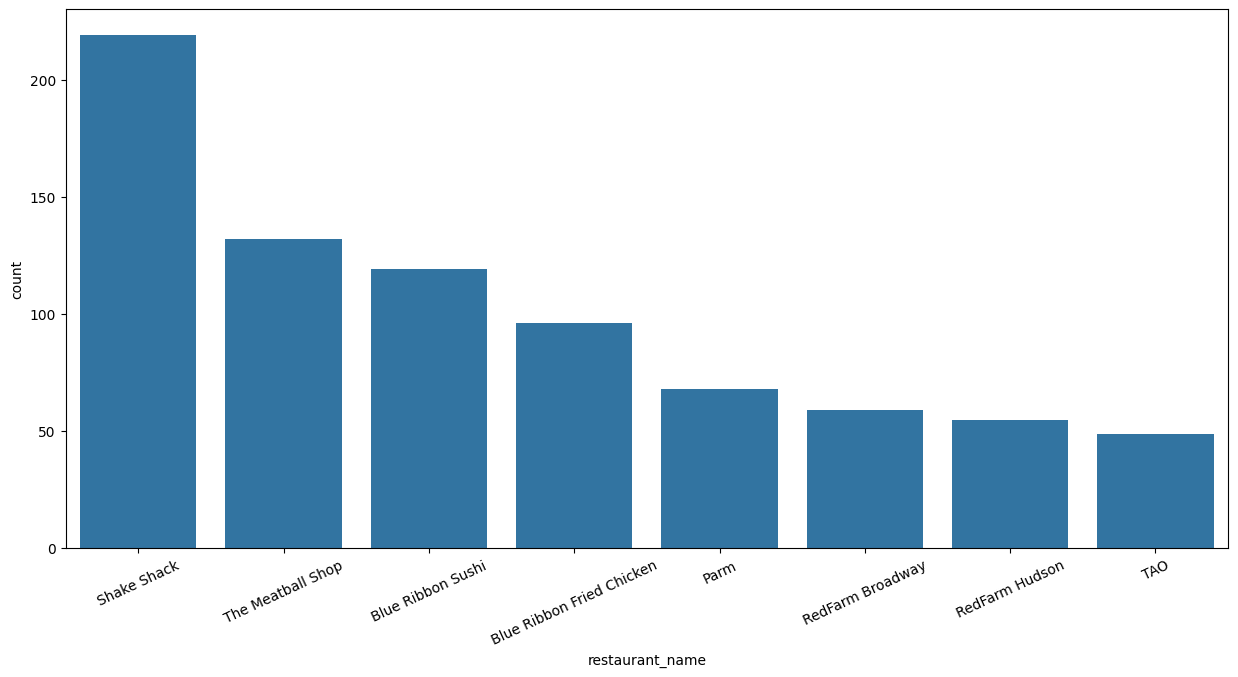

In [ ]:
plt.subplots(figsize=(15,7))
sns.countplot(data=data, x='restaurant_name', order=data.restaurant_name.value_counts().iloc[:8].index)
plt.xticks(rotation=25)
plt.show()

### Observations:
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken are the most popular restaurants on the app.

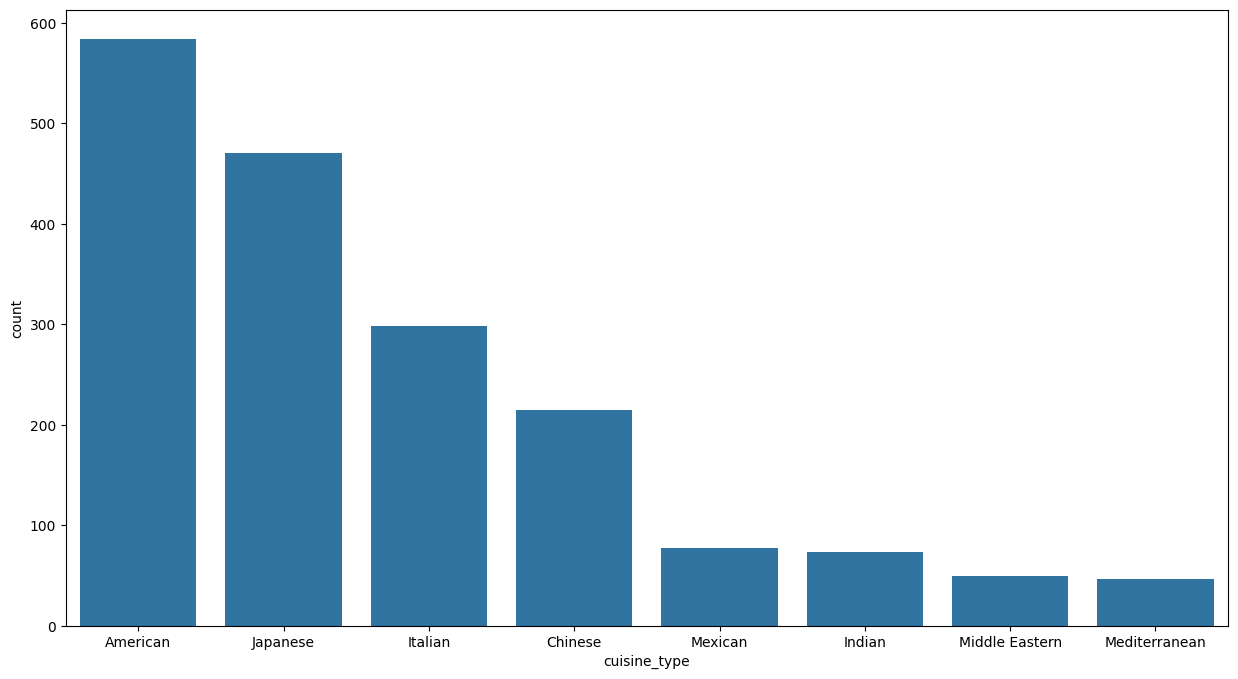

In [ ]:
plt.subplots(figsize=(15,8))
sns.countplot(data=data, x='cuisine_type', order=data.cuisine_type.value_counts().iloc[:8].index)
plt.show()

### Observations:
* Based on the countplot above, American, Japanese, Italian and Chinese are the most popular cuisines on the app.

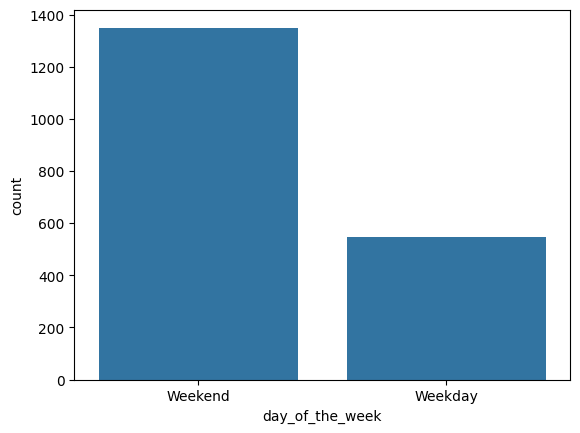

In [ ]:
sns.countplot(x='day_of_the_week', data=data, order=data['day_of_the_week'].value_counts().index)
plt.show()

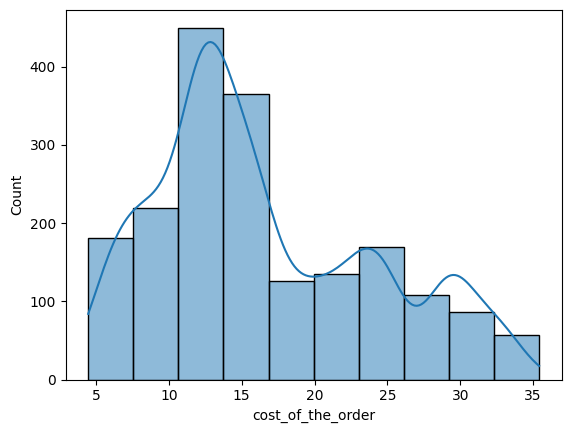

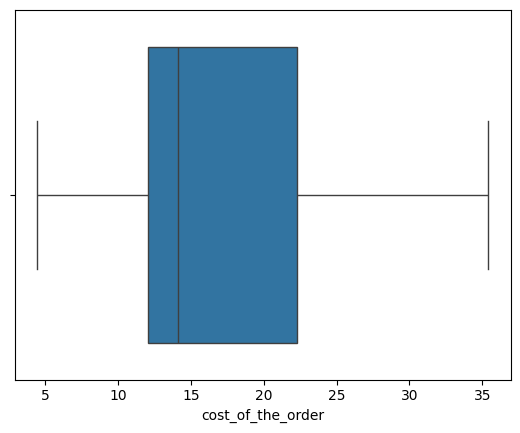

In [ ]:
sns.histplot(data=data, x='cost_of_the_order', kde=True, bins=10)
plt.show()

sns.boxplot(data=data, x='cost_of_the_order')
plt.show()

In [ ]:
# Calculates the average cost of the order
data['cost_of_the_order'].mean()

16.498851422550054

###Observations:
* The cost of the order is right-skewed.
* The average cost of the order is $16.49.
* The median cost of the order is around $11.

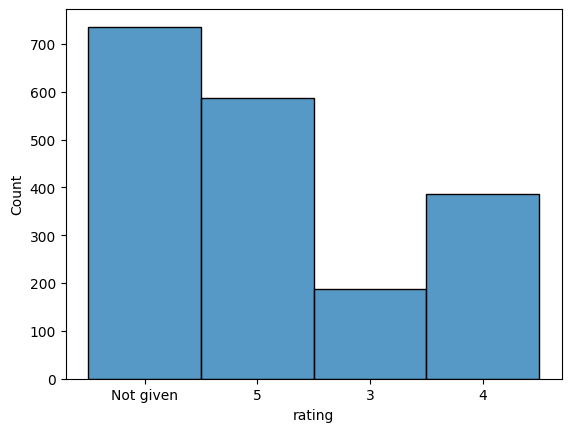

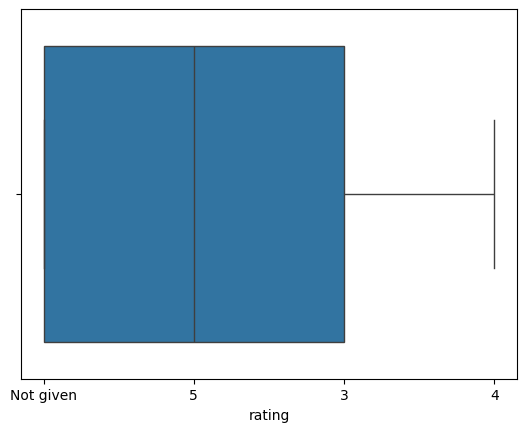

In [ ]:
sns.histplot(data = data, x ='rating',bins=10)
plt.show()

sns.boxplot(data=data, x='rating')
plt.show()

###Observations:
* Based on the histplot and boxplot,many orders are not rated.
* The boxplot for rating has a long right whisker.

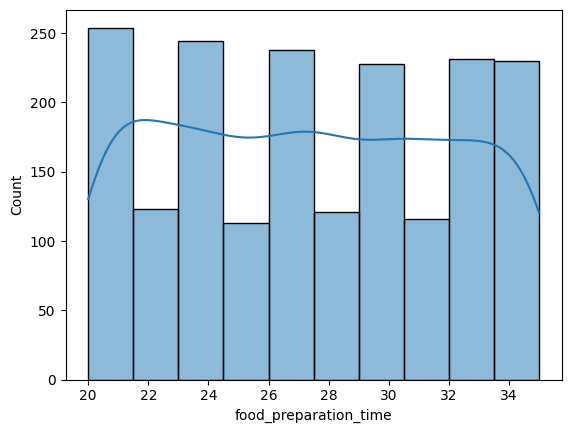

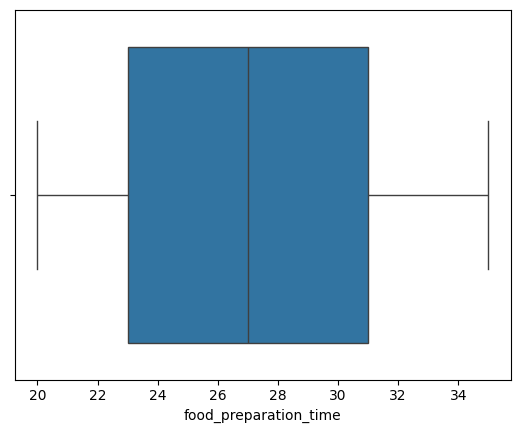

In [ ]:
sns.histplot(data['food_preparation_time'],kde=True, bins=10)
plt.show()

sns.boxplot(data=data, x='food_preparation_time')
plt.show()

###Observations:
* The food preparation time is evenly distributed.
* The median food preparation time is 27 minutes.

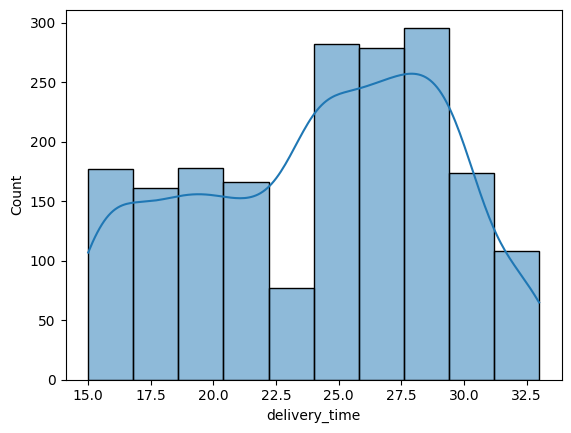

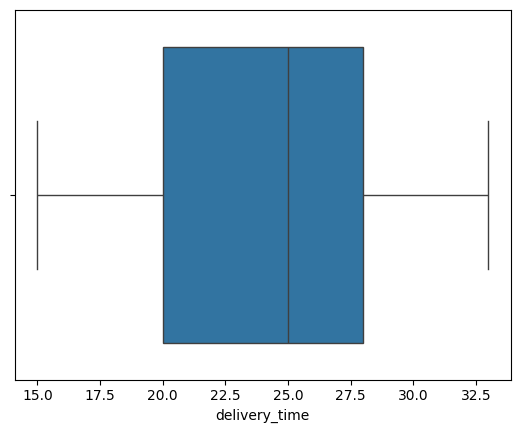

In [ ]:
sns.histplot(data['delivery_time'],kde=True, bins=10)
plt.show()

sns.boxplot(data=data, x='delivery_time')
plt.show()

###Observations:
* The delivery time has a left-skewed distribution.
* The median delivery time is 25 minutes.
* The least favorite cuisine is Vietnamese.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
data['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* Shake Shack received the most orders (219 orders)
+ This is followed by The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders) and Parm (68 orders)
* The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Shows the top three cuisines on weekends
data.groupby(['day_of_the_week','cuisine_type'])['cuisine_type'].count().sort_values(ascending=False).head(3)

day_of_the_week  cuisine_type
Weekend          American        415
                 Japanese        335
                 Italian         207
Name: cuisine_type, dtype: int64

#### Observations:
* The most popular cuisine on weekends are American, Japanese and Italian.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Shows the percentage of orders that cost more than 20 dollars
data[data['cost_of_the_order']>20].shape[0]/data.shape[0]*100

29.24130663856691

#### Observations:
* 29.24% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Shows the mean order delivery time
round(data['delivery_time'].mean(),1)

24.2

#### Observations:
* The average delivery time is 24.2 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Shows the top 2 most frequent customers to give 20% discount vouchers
data['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* Customer_ID 52832 has placed 13 orders
* Customer_ID 47440 has placed 10 orders
* Customer_ID 83287 has placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


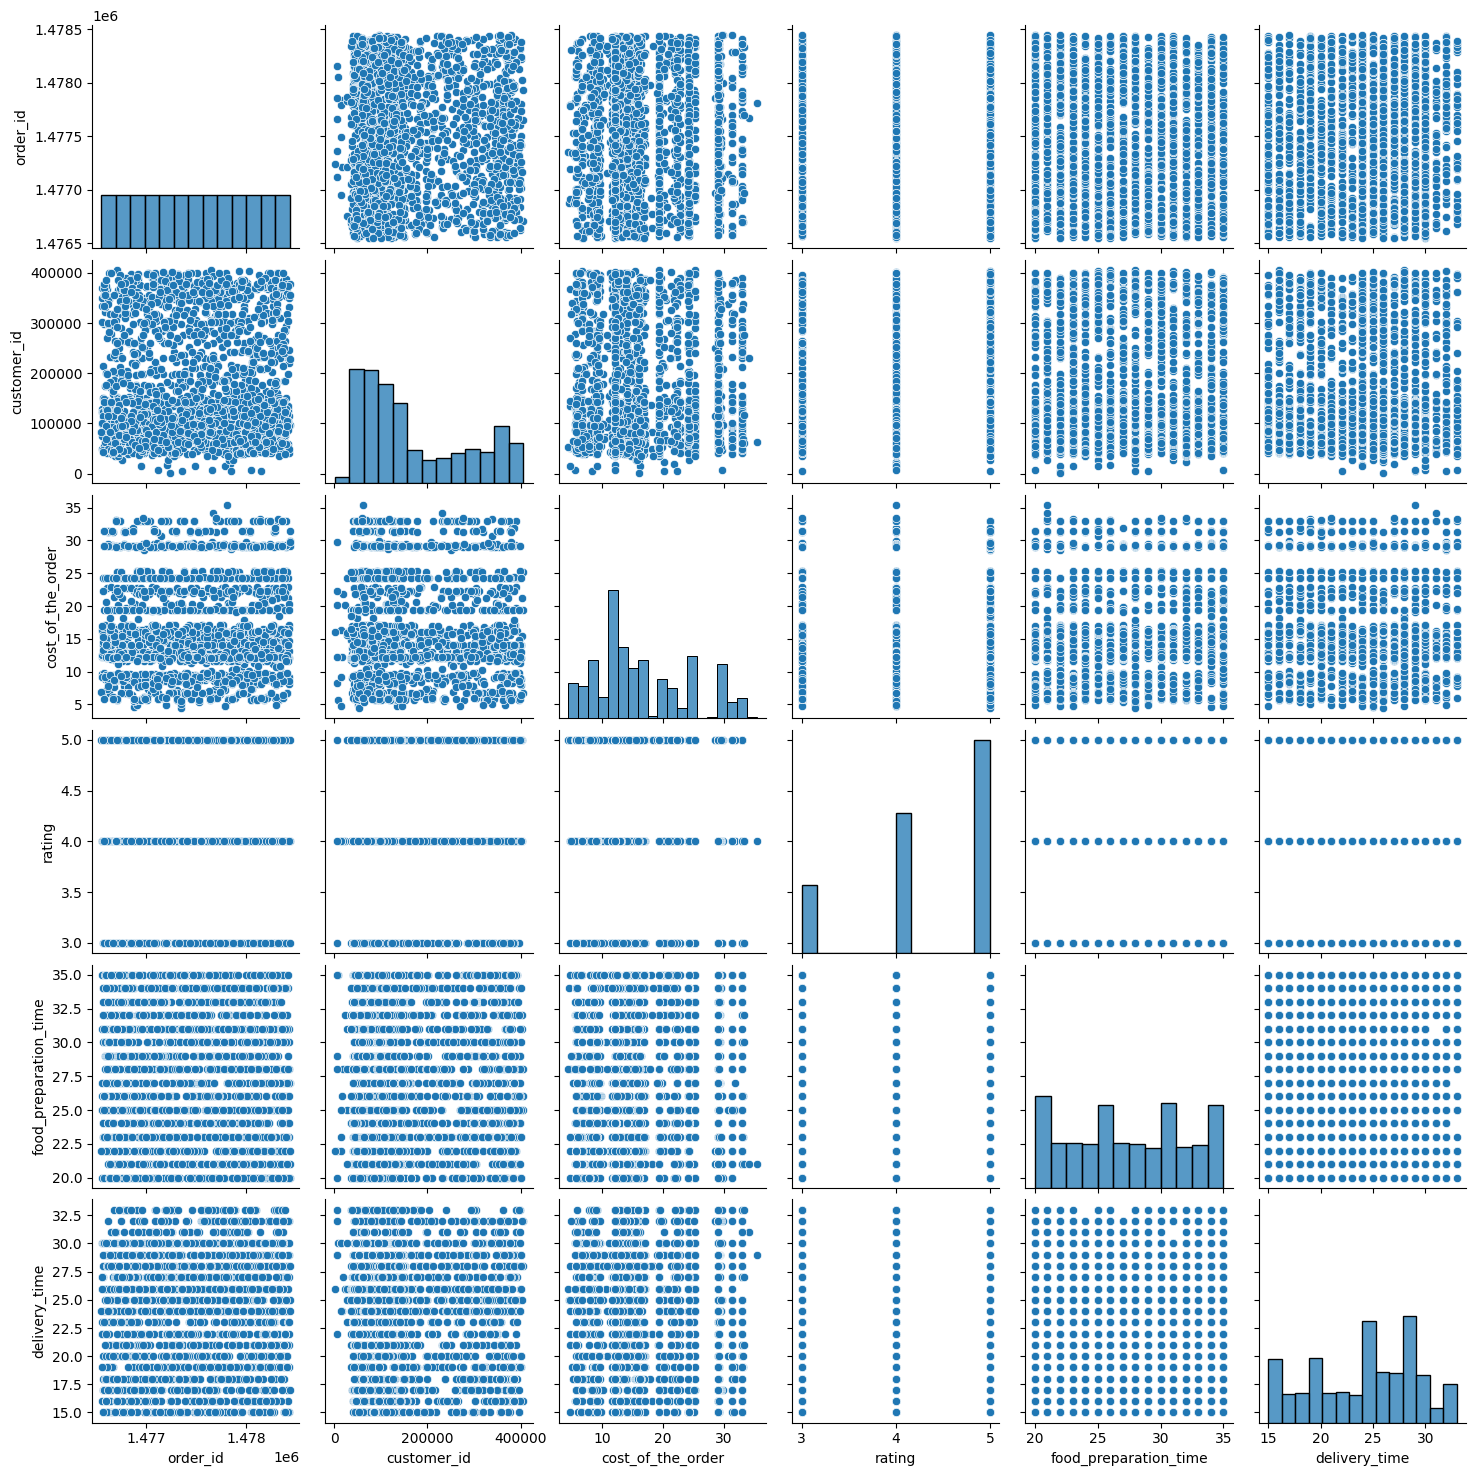

In [ ]:
sns.pairplot(data=data)
plt.show()

###Observations:
* There is no linear relationship between categorical and numerical variables in the dataset.

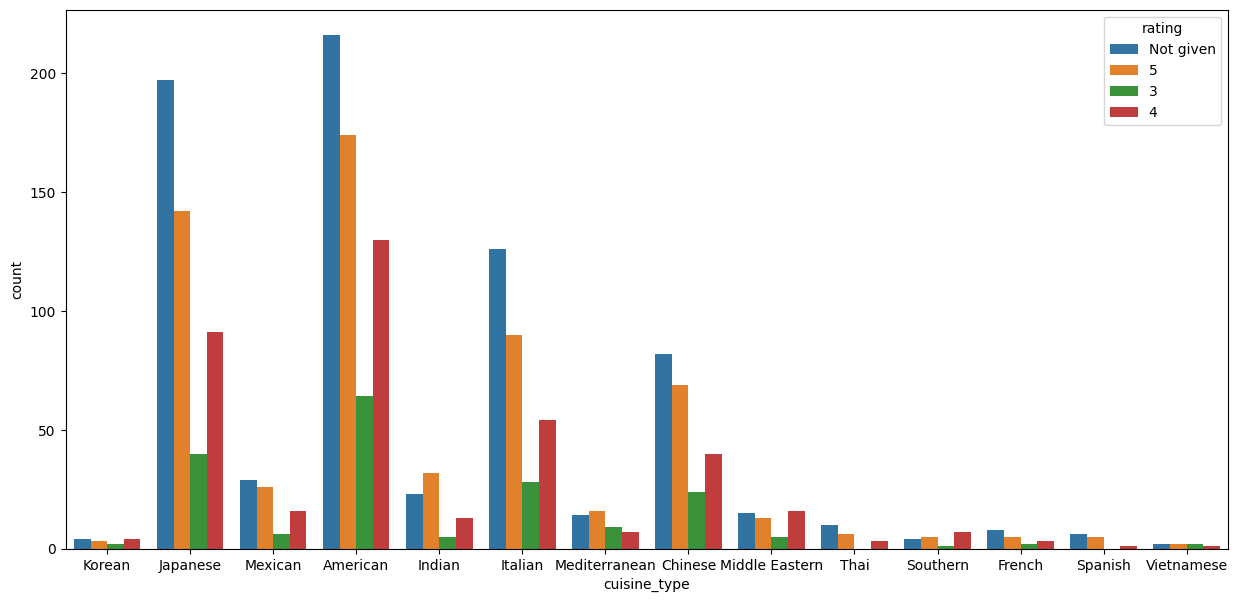

In [ ]:
plt.subplots(figsize=(15,7))
sns.countplot(data=data, x='cuisine_type', hue='rating')
plt.show()

###Observations:
* Although American, Japanese and Italian cuisines are popular among most customers, many orders are not rated.
* The most popular cuisines are also highly rated by FoodHub app users.

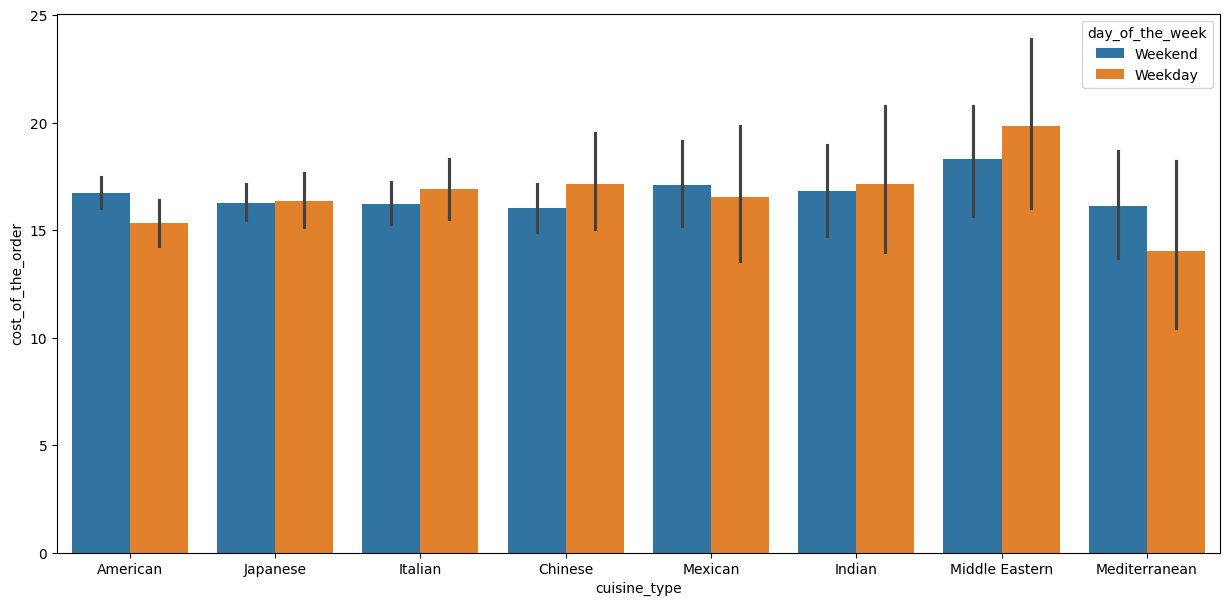

In [6]:
plt.subplots(figsize=(15,7))
sns.barplot(data=data, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', order = data.cuisine_type.value_counts().iloc[:8].index)
plt.show()

###Observations:
* Middle Eastern cuisine have higher cost of order on weekdays.
* American cuisine have higher cost of order on weekends.
* The cost of the order is same for weekday and weekend for Japanese cuisine.

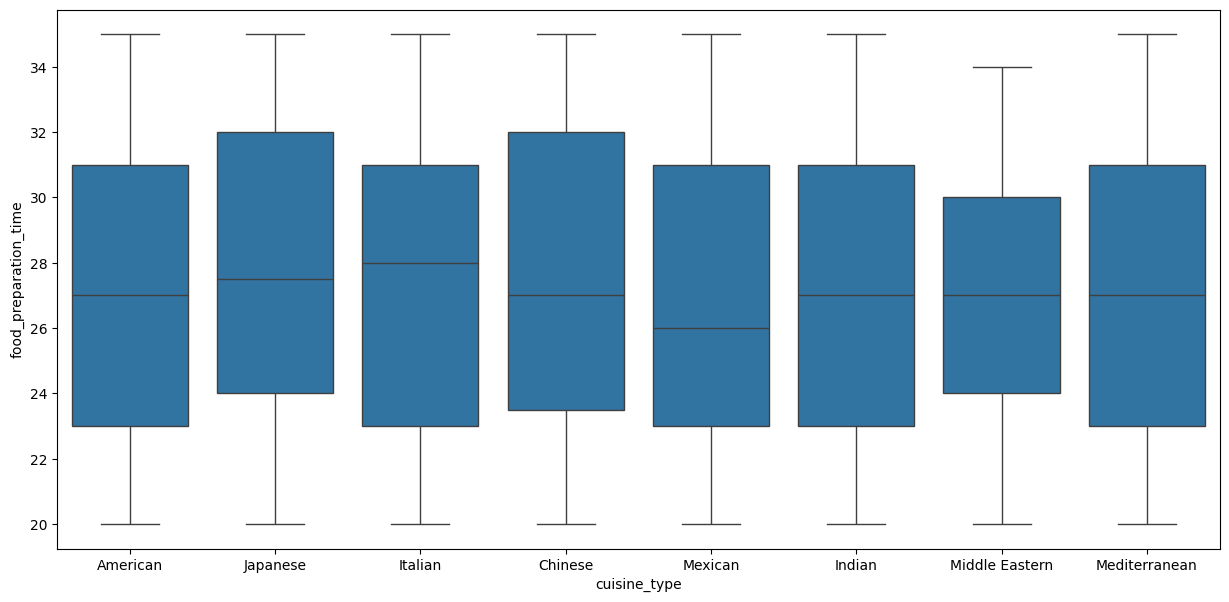

In [ ]:
plt.subplots(figsize=(15,7))
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time', order = data.cuisine_type.value_counts().iloc[:8].index)
plt.show()

###Observations:
* Japanese and Chinese cuisine takes around 32 minutes to be prepared.
* Mexican cuisine has the lowest median food preparation time.

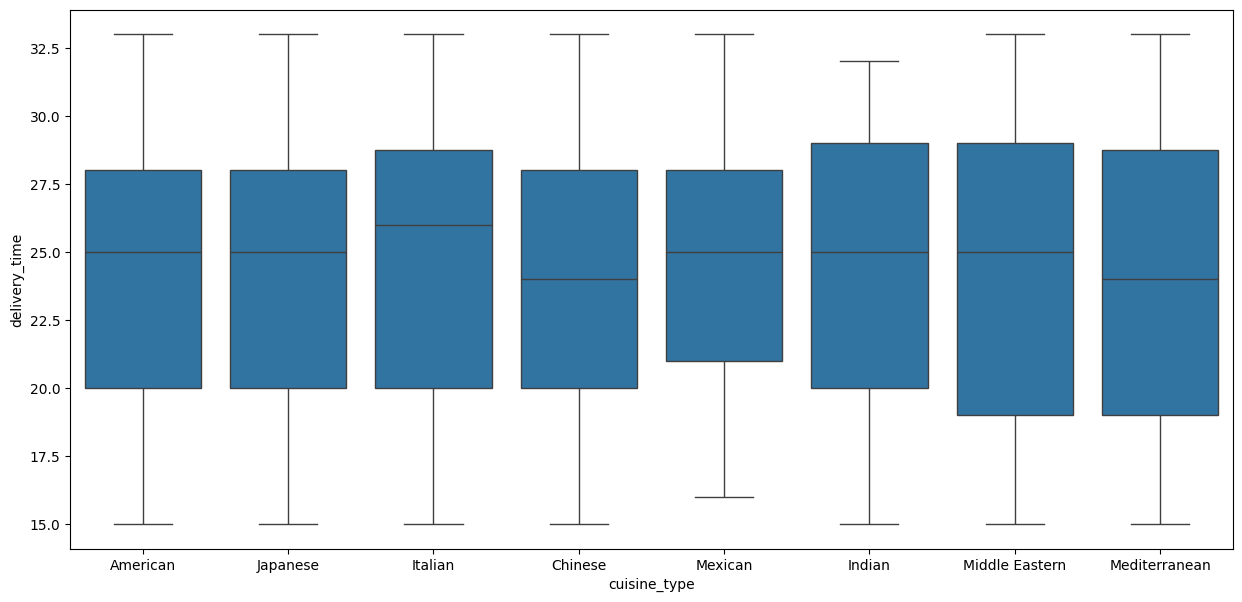

In [ ]:
plt.subplots(figsize=(15,7))
sns.boxplot(data=data, x='cuisine_type', y='delivery_time', order=data.cuisine_type.value_counts().iloc[:8].index)
plt.show()

###Observations:
* American, Japanese, Mexican and Chinese restaurants take 27.5 minutes to deliver the food to its customers.

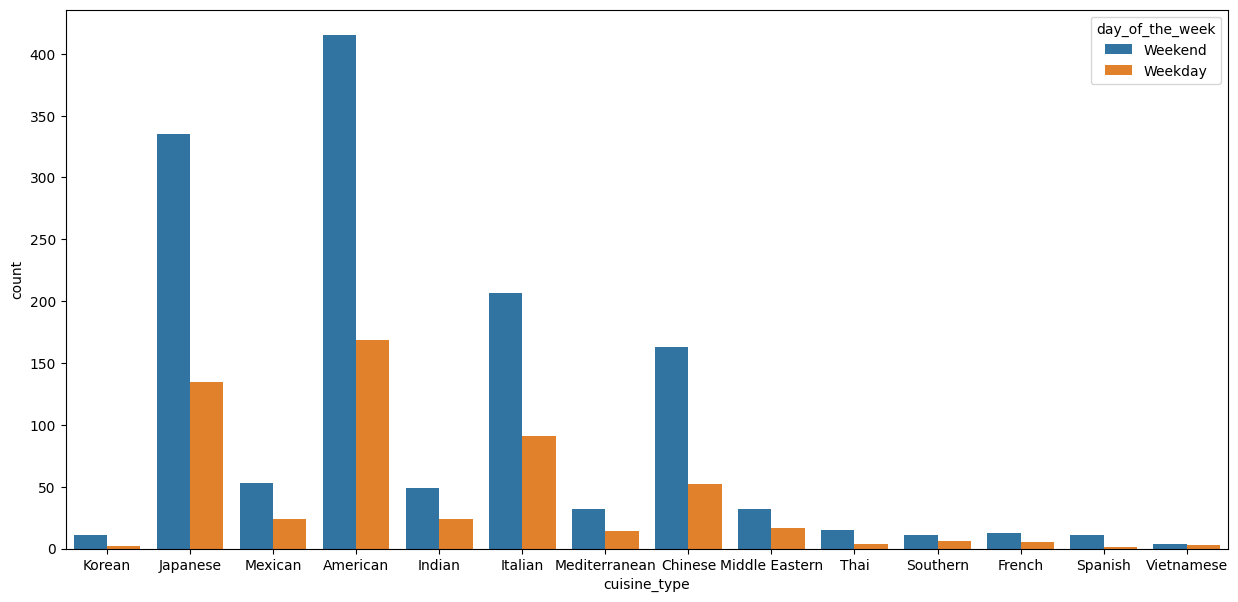

In [ ]:
plt.subplots(figsize=(15,7))
sns.countplot(data=data, x='cuisine_type', hue='day_of_the_week')
plt.show()

###Observations:
* Japanese, American, Italian and Chinese cuisines are ordered the most on weekends.
* American, Italian, Chinese and Japanese cuisines are ordered the most on weekdays.
* The average cost of order is $16 on weekdays and weekends.

In [ ]:
data.groupby(['day_of_the_week'])['cost_of_the_order'].mean()

day_of_the_week
Weekday    16.311188
Weekend    16.574833
Name: cost_of_the_order, dtype: float64

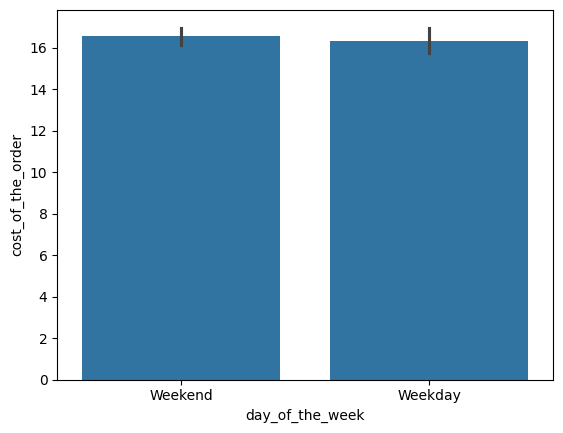

In [ ]:
sns.barplot(data=data, x='day_of_the_week', y='cost_of_the_order')
plt.show()

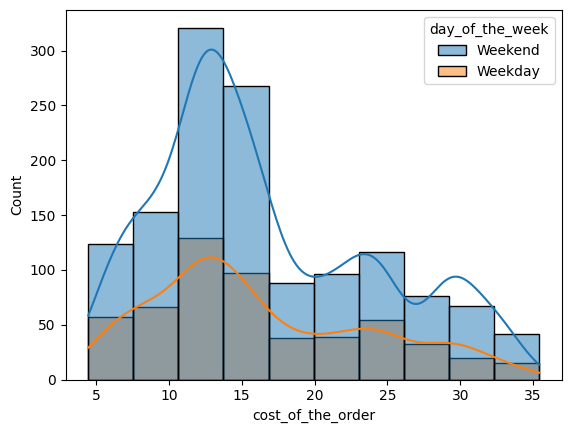

In [ ]:
sns.histplot(data=data, x='cost_of_the_order', hue='day_of_the_week', kde=True, bins=10)
plt.show()

###Observations:
* Regardless of the day of the week, the cost of the order is between 10 to 15 dollars.

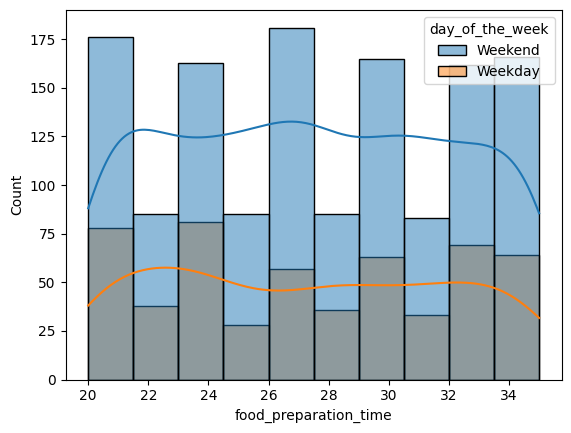

In [ ]:
sns.histplot(data=data, x='food_preparation_time', hue='day_of_the_week', kde=True, bins=10)
plt.show()

###Observations:
* Most of the food takes around 26 to 28 minutes to be prepared in the weekend.

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

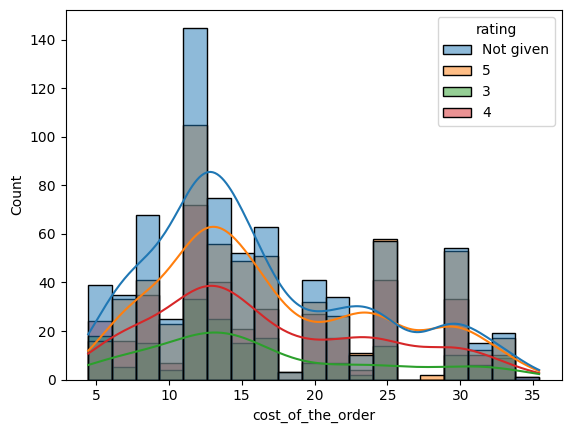

In [ ]:
sns.histplot(data=data, x='cost_of_the_order', hue='rating', kde=True)

###Observations:
* Most orders that cost around $11 are highly rated by customers.

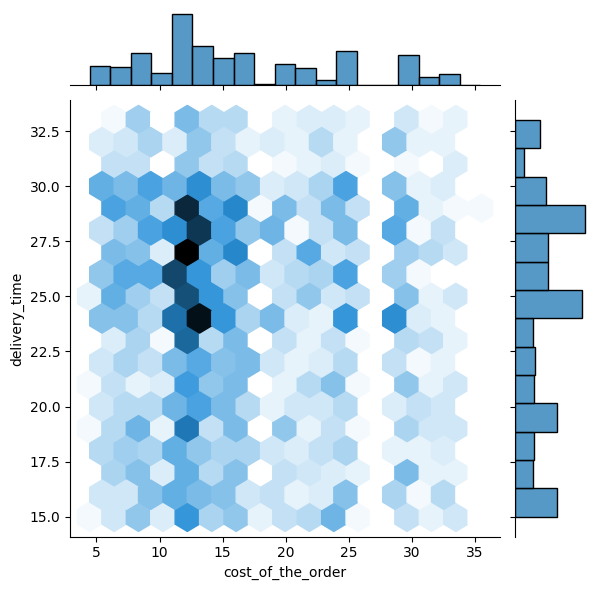

In [ ]:
sns.jointplot(data=data, x='cost_of_the_order', y='delivery_time', kind='hex')

###Observations:
* The jointplot suggests that most orders take around 22.5 to 30 minutes to be delivered while the cost of the order is around 10 to 15 dollars.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Step 1: Convert 'rating' to numeric, coerce errors to NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Step 2: Drop rows where 'rating' is NaN
data_cleaned = data.dropna(subset=['rating'])

# Step 3: Filters out restaurants with an average rating greater than 4
data_ratings = data[['restaurant_name','rating']][data['rating'] != 'Not given'].groupby('restaurant_name').mean()>4
data_ratings.reset_index(inplace=True)

# Step 4: Filters out restaurants with a rating count greater than 50
data_count = data[['rating', 'restaurant_name']][data['rating'] != 'Not given'].groupby('restaurant_name').count()>50
data_count.reset_index(inplace=True)

# Step 5: Shows restaurants that are eligible for the promotional offer
fulfilling_restaurants = pd.merge(data_count[data_count['rating'] == True], data_ratings[data_ratings['rating']== True], on='restaurant_name')
fulfilling_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
* Based on the data shown above, The Meatball Shop, Shake Shack, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are the only restaurants that are eligible for the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
cost_greater_than_20 = data[data['cost_of_the_order']>20]
revenue_1 = cost_greater_than_20.cost_of_the_order.sum()*0.25

cost_less_than_20 = data[data['cost_of_the_order']<=20]
revenue_2 = cost_less_than_20[cost_less_than_20.cost_of_the_order>5].cost_of_the_order.sum()*0.15

net_revenue = revenue_1 + revenue_2
round(net_revenue,2)


6166.3

#### Observations:
* The company can generate a net revenue of $6166.30 for charging restaurants 25% on orders that cost greater than 20 dollars and 15% on orders that cost greater than 5 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
round(data[data['total_time']>60].shape[0]/data.shape[0]*100,2)

10.54

#### Observations:
* Only 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
data.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
* The average delivery time is higher on weekdays and lower on weekends.
* The average delivery time on weekends are 22.47 minutes.
* The average delivery time on weekdays are 28.34 minutes.
* There is less traffic congestion in the city during weekends.

 ### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Most of the orders were placed on weekends (1351 orders).
* Majority of customers placed only one or two orders.
* Only Shake Shack, The Meatball Shop and Blue Ribbon Sushi received more than 100 orders. Most of the restaurants in the dataset fail to cross the 50 order mark.

### Recommendations:

*  The company must offer incentives to the customer such as promotional offers, so they will order more frequently from their favorite restaurants.
* The company must offer incentives to delivery drivers for working on weekdays such as higher pay rate.
* Underperforming restaurants must improve their food quality and packaging to increase their revenue. Restaurants with a niche cuisine type need to improve their marketing strategy to appeal to a variety of customers.


---